# **Black Scholes Python**

1. The Black Scholes model, also known as the Black-Scholes-Merton (BSM) model, is a mathematical model for pricing an options contract. In particular, the model estimates the variation over time of financial instruments such as stocks, and using the implied volatility of the underlying asset derives the price of a call option.

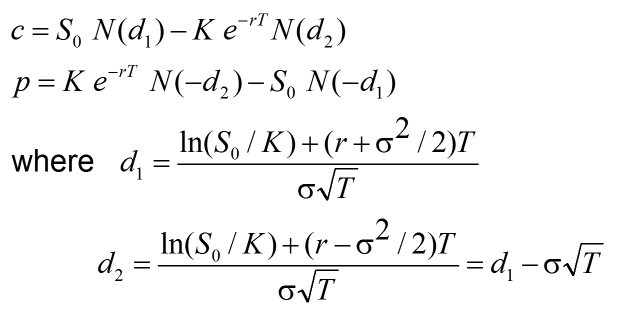

In [ ]:
import scipy.stats as si
from scipy import optimize
import sympy as sy
import numpy as np
import sympy.stats as systats

In [ ]:
import pandas as pd
options_df = pd.read_csv("../input/option_GS_df.csv", parse_dates=["Expiration", ' DataDate'])
options_df['date_diff'] = (options_df['Expiration'] - options_df[' DataDate']).dt.days
options_df['Spread'] = options_df['Ask'] - options_df['Bid']

options_df.head(10)

In [ ]:
cols = ', '.join(x for x in options_df.columns)
cols

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

curr_price_ = options_df.iloc[0,0]
plt.figure(figsize=(10, 6))
plt.scatter(options_df.Strike, options_df.IVBid, label='IV to Strike', \
            c='royalblue')
plt.vlines(curr_price_, options_df.IVBid.min(), \
           options_df.IVBid.max(), \
           label='Current GS price - ${}'.format(curr_price_), \
           linestyles='--', colors='gray')
plt.xlabel('Strike price - $')
plt.ylabel('IV')
plt.title('Options Volatility smile')
plt.legend(fontsize='large')
#plt.savefig('imgs/Options/volatilitysmile.jpg', dpi=100)
plt.show()

In [ ]:
curr_price_ = options_df.iloc[0,0]
plt.figure(figsize=(10, 6))
plt.scatter(options_df.Strike, options_df.IVAsk, label='IV to Strike', \
            c='royalblue')
plt.vlines(curr_price_, options_df.IVAsk.min(), \
           options_df.IVAsk.max(), \
           label='Current GS price - ${}'.format(curr_price_), \
           linestyles='--', colors='gray')
plt.xlabel('Strike price - $')
plt.ylabel('IV')
plt.title('Options Volatility smile')
plt.legend(fontsize='large')
#plt.savefig('imgs/Options/volatilitysmile.jpg', dpi=100)
plt.show()

*Segmenting the input data into calls and puts respectively to carry out individual operations*

In [ ]:
options_df_call = options_df[options_df['Type'] == 'call'].reset_index(drop = True)
options_df_put = options_df[options_df['Type'] != 'call'].reset_index(drop = True)
print(options_df_call.head(10))
options_df_put.head(10)

> Call option Implied Volatility Smile

In [ ]:
curr_price_ = options_df_call.iloc[0,0]
plt.figure(figsize=(10, 6))
plt.scatter(options_df_call.Strike, options_df_call.IVAsk, label='IV to Strike', \
            c='royalblue')
plt.vlines(curr_price_, options_df_call.IVAsk.min(), \
           options_df_call.IVAsk.max(), \
           label='Current GS price - ${}'.format(curr_price_), \
           linestyles='--', colors='gray')
plt.xlabel('Strike price - $')
plt.ylabel('IV')
plt.title('Options Volatility smile')
plt.legend(fontsize='large')
#plt.savefig('imgs/Options/volatilitysmile.jpg', dpi=100)
plt.show()

In [ ]:
def european_options(S, K, t, r, sigma):
    d1 = (np.log(S/K) + (r + (sigma**2/2) * (t)))/(sigma* (np.sqrt(t)))
    d2 = d1 - sigma * (np.sqrt(t))
    
    call = S* si.norm.cdf(d1, 0, 1) - K* np.exp(r*t)*si.norm.cdf(d2)
    put = K* np.exp(r*t)*si.norm.cdf(-d2, 0, 1) - S * si.norm.cdf(-d1, 0, 1)
    #print (d1)
    return call, put
    #return call

In [ ]:
#testcase
print("Call and put prices are",european_options(50, 100, 1, 0.05, 0.25),"respectively")

price = european_options(50, 100, 1, 0.05, 0.25)
#price[1]
cols

In [ ]:
# Libor 1 month rate during May 2016 was ~0.56%
df = options_df_call
test = european_options(df.UnderlyingPrice[1], df.Strike[1], df.date_diff[1], 0.0056, df.IVMean[1])
answer = test[0]
answer, df['Bid'][1], test[1]

In [ ]:
def modelledprices(data, r = 0.0056):
    data['m_prices'] = 0
    for i,j in enumerate(data['Strike']):
        df = data
        #print(j)
        test = european_options(df.UnderlyingPrice[i], df.Strike[i], df.date_diff[i], 0.0056, df.IVMean[i])
        answer = test[0]
        data['m_prices'][i]= answer
    return data

In [ ]:
final = modelledprices(options_df_call)
final[['Bid','m_prices']].head(10)

> *Sympy will return the exact implementation with formulae*

In [ ]:
def euro_call_sym(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    N = systats.Normal('d',0.0, 1.0)
    
    d1 = (sy.ln(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sy.sqrt(T))
    d2 = (sy.ln(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sy.sqrt(T))
    
    call = (S * N.cdf(d1) - K * sy.exp(-r * T) * N.cdf(d2))
    
    return call


In [ ]:
#euro_call_sym(50, 100, 1, 0.05, 0.25) #Sympy has been upgraded, need to make minor changes in func to make it work

In [ ]:
#from mibian import BS  #The package has to be installed externally

In [ ]:
def european_options_call(S, K, t, r, sigma):
    d1 = (np.log(S/K) + (r + (sigma**2/2) * (t)))/(sigma* (np.sqrt(t)))
    d2 = d1 - sigma * (np.sqrt(t))
    
    call = S* si.norm.cdf(d1, 0, 1) - K* np.exp(r*t)*si.norm.cdf(d2)
    #put = K* np.exp(r*t)*si.norm.cdf(-d2, 0, 1) - S * si.norm.cdf(-d1, 0, 1)
    #print (d1)
    return call

In [ ]:
def calc_impl_vol(price = 5., right = 'c', underlying = 100., strike = 100., time = 1., rf = 0.01, inc = 0.001):
  
   f = lambda x: european_options_call(S=underlying,K=strike,t=time,r=rf,sigma = x) - price   #(S, K, t, r, sigma)
  
   #return optimize.brentq(f,0.,5.)
   return optimize.brentq(f,0.,5.)

In [ ]:
calc_impl_vol(price = 25., underlying = 100., strike = 80., time = 1., rf = 0.01)

***Simple Integration to get CDF of Normal Distribution***

In [ ]:
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [ ]:
x_min = 0.0
x_max = 16.0

mean = 8.0 
std = 3.0

x = np.linspace(x_min, x_max, 100)

y = si.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

In [ ]:
def normal_distribution_function(x):
    value = si.norm.pdf(x,mean,std)
    return value

In [ ]:
x1 = mean + std
x2 = mean + 2.0 * std

res, err = quad(normal_distribution_function, x1, x2)

print('Normal Distribution (mean,std):',mean,std)
print('Integration bewteen {} and {} --> '.format(x1,x2),res)

In [ ]:
ptx = np.linspace(x1, x2, 10)
pty = si.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')
plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)

plt.title('How to integrate a normal distribution in python ?',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

plt.savefig("integrate_normal_distribution.png")
plt.show()

In [ ]:
#Import libraries
import random
import matplotlib.pyplot as plt

In [ ]:
#Create function for simulating die roll 
#The die can take values from 1 to 100. If the number is between 1 #and 51, the house wins. 
#If the number is between 52 and 100, the player wins.
def rolldice():
    
    dice = random.randint(1,100)
    
    if dice <=51:
        return False
    elif dice >51 & dice <=100:
        return True

In [ ]:
#Define a function for the play which takes 3 arguments :
#1. total_funds = total money in hand the player is starting with
#2. wager_amount = the betting amount each time the player plays
#3. total_plays = the number of times the player bets on this game
def play(total_funds, wager_amount, total_plays):
    
    #Create empty lists for :
    # 1.Play_number and 
    # 2.Funds available
    # 3.Final Fund
    Play_num = []
    Funds = []
#Start with play number 1
    play = 1
#If number of plays is less than the max number of plays we have set
    while play < total_plays:
        #If we win
        if rolldice():
            #Add the money to our funds
            total_funds = total_funds + wager_amount
            #Append the play number
            Play_num.append(play)
            #Append the new fund amount
            Funds.append(total_funds)
        #If the house wins
        else:
            #Add the money to our funds
            total_funds = total_funds - wager_amount 
            #Append the play number
            Play_num.append(play)
            #Append the new fund amount
            Funds.append(total_funds)
            
        #Increase the play number by 1
        play = play + 1
        
    #Line plot of funds over time
    plt.plot(Play_num,Funds)
    Final_funds.append(Funds[-1])
    return(Final_funds)

In [ ]:
#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,1000)
    x=x+1
#Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()
#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))

In [ ]:
ending_fund = play(10000,100,20000)